In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('../scripts')
from text_processor import ProcessText

In [ ]:
data = pd.read_csv('../data/complaints.csv')

/tmp/ipython-input-3-454236810.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drive/MyDrive/complaints.csv')


In [ ]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


### Distribution of Complaints Across Different Products

This section analyzes how consumer complaints are distributed across various financial products. 

- We first count the number of complaints for each product using the `value_counts()` method on the `Product` column.
- The results are visualized using a bar plot, where each bar represents a product and its corresponding number of complaints.
- The x-axis lists the product names, and the y-axis shows the number of complaints.
- Product names are rotated for better readability, and the layout is adjusted to prevent label overlap.

This visualization helps identify which products receive the most consumer complaints, providing insight into potential areas of concern within the financial industry.


--- Distribution of Complaints Across Different Products ---
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                           

/tmp/ipython-input-5-3116641994.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')


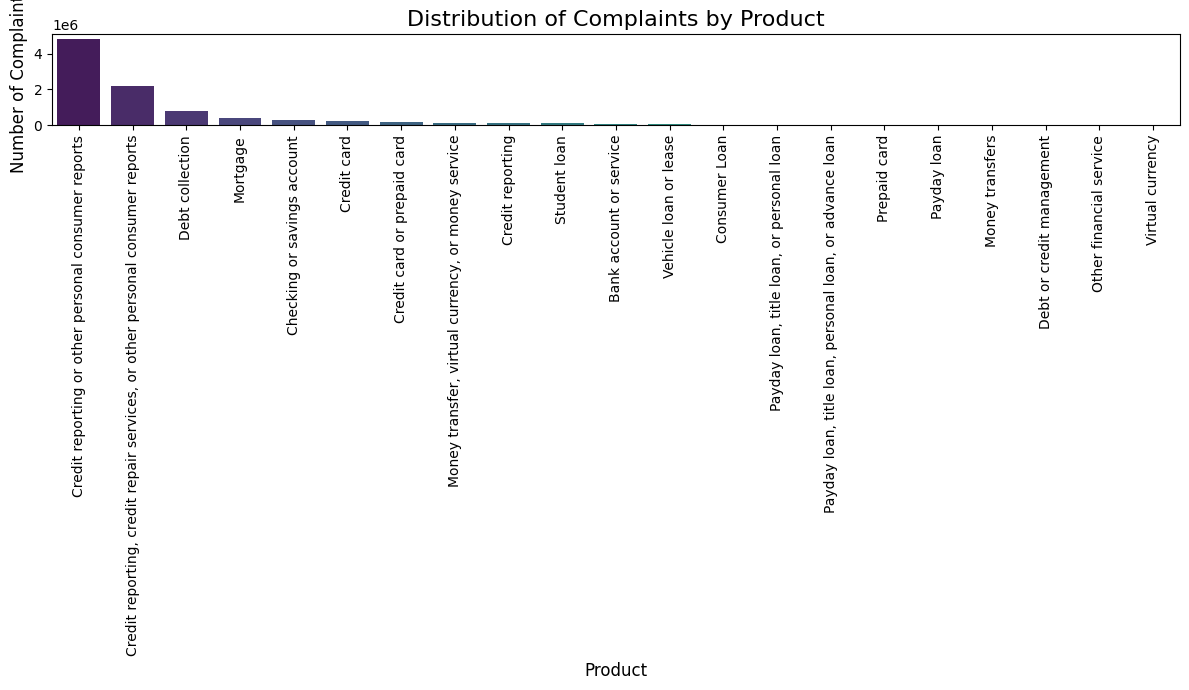

In [ ]:
print("\n--- Distribution of Complaints Across Different Products ---")

# Assuming 'Product' is the column containing product names
product_distribution = data['Product'].value_counts()
print(product_distribution)

# Visualize the distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')
plt.title('Distribution of Complaints by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(rotation=90) # Rotate labels for better readability if product names are long
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
data['Product'].unique()

array(['Credit reporting or other personal consumer reports',
       'Debt collection', 'Credit card', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Vehicle loan or lease', 'Debt or credit management', 'Mortgage',
       'Payday loan, title loan, personal loan, or advance loan',
       'Prepaid card', 'Student loan', 'Credit reporting',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan',
       'Bank account or service', 'Money transfers', 'Consumer Loan',
       'Payday loan', 'Other financial service', 'Virtual currency'],
      dtype=object)

### Handling Missing Consumer Complaint Narratives and Calculating Word Count

Before analyzing the length of consumer complaint narratives, it is important to address missing values in the dataset. Missing narratives can cause errors when performing text-based operations such as word counting. To prevent this:

- Any missing values in the `Consumer complaint narrative` column are filled with an empty string (`''`).
- The word count for each narrative is then calculated by splitting the text on whitespace and counting the resulting words.
- The computed word count is stored in a new column, `narrative_word_count`.

This preprocessing ensures that subsequent analyses of narrative length are accurate and robust, even in the presence of missing data.

In [ ]:
# First, handle potential missing narratives by filling them with an empty string
# This prevents errors when calculating word count
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].fillna('')
data['narrative_word_count'] = data['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

### Analysis of Consumer Complaint Narrative Length

This section examines the length of consumer complaint narratives to better understand the nature of the submitted complaints.

- **Handling Missing Narratives:** Any missing values in the `Consumer complaint narrative` column are filled with an empty string to ensure accurate word count calculations.
- **Word Count Calculation:** The number of words in each narrative is computed by splitting the text on whitespace. The result is stored in a new column, `narrative_word_count`.
- **Descriptive Statistics:** Summary statistics (mean, median, min, max, etc.) for narrative word counts are displayed to provide an overview of narrative lengths.
- **Visualization:** The distribution of narrative word counts is visualized using a histogram, focusing on the bulk of the data and avoiding extreme outliers.
- **Identifying Extremes:** The number of very short narratives (less than 10 words) and very long narratives (more than 500 words) is reported.

This analysis helps identify patterns in how much detail consumers provide in their complaints and can inform further text analysis or data cleaning steps.


--- Analysis of Consumer Complaint Narrative Length ---

Descriptive statistics for narrative word count:
count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_word_count, dtype: float64


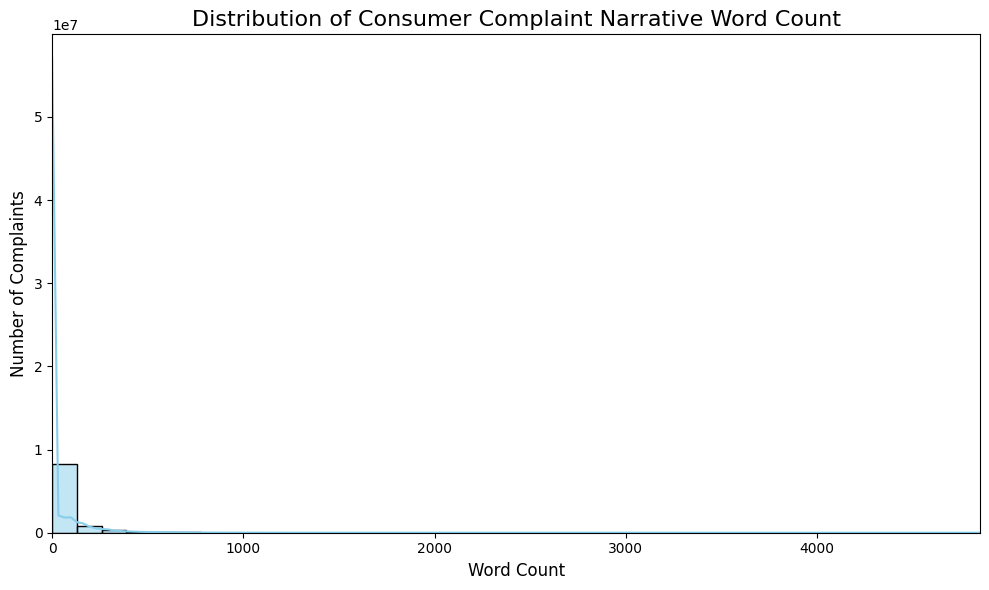


Number of very short narratives (less than 10 words): 6650979
Number of very long narratives (more than 500 words): 160989


In [ ]:
print("\n--- Analysis of Consumer Complaint Narrative Length ---")

# First, handle potential missing narratives by filling them with an empty string
# This prevents errors when calculating word count
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].fillna('')

# Calculate word count for each narrative
# We split by whitespace to count words
data['narrative_word_count'] = data['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

# Display descriptive statistics for narrative word count
print("\nDescriptive statistics for narrative word count:")
print(data['narrative_word_count'].describe())

# Visualize the distribution of narrative word count
plt.figure(figsize=(10, 6))
sns.histplot(data['narrative_word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Consumer Complaint Narrative Word Count', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xlim(0, data['narrative_word_count'].max() * 0.75) # Adjust x-axis to focus on bulk of data, avoiding extreme outliers
plt.tight_layout()
plt.show()

# Identify very short or very long narratives
# Define thresholds for "very short" and "very long" based on your data's distribution
# For example, narratives with less than 10 words or more than 500 words
very_short_narratives = data[data['narrative_word_count'] < 10].shape[0]
very_long_narratives = data[data['narrative_word_count'] > 500].shape[0]

print(f"\nNumber of very short narratives (less than 10 words): {very_short_narratives}")
print(f"Number of very long narratives (more than 500 words): {very_long_narratives}")

# You can also inspect a few examples of very short/long narratives if needed
# print("\nExample of a very short narrative:")
# print(df[df['narrative_word_count'] < 10]['Consumer complaint narrative'].sample(1).values[0])
# print("\nExample of a very long narrative:")
# print(df[df['narrative_word_count'] > 500]['Consumer complaint narrative'].sample(1).values[0])

### Complaints With and Without Narratives

This section quantifies the presence of consumer complaint narratives in the dataset:

- **Complaints with Narratives:** The number of complaints where the `Consumer complaint narrative` field is not empty (after filling missing values with an empty string).
- **Complaints without Narratives:** The number of complaints where the narrative field is empty.
- **Total Complaints:** The overall number of complaint records in the dataset.

Understanding the proportion of complaints with and without narratives is important for downstream text analysis, as only records with narratives can be used for natural language processing and sentiment analysis.

In [ ]:
print("\n--- Complaints With and Without Narratives ---")

# Count complaints where the narrative is not empty (after filling NaN with '')
complaints_with_narratives = data[data['Consumer complaint narrative'].str.strip() != ''].shape[0]

# Count complaints where the narrative is empty
complaints_without_narratives = data[data['Consumer complaint narrative'].str.strip() == ''].shape[0]

print(f"Number of complaints with narratives: {complaints_with_narratives}")
print(f"Number of complaints without narratives: {complaints_without_narratives}")
print(f"Total complaints: {data.shape[0]}")


--- Complaints With and Without Narratives ---
Number of complaints with narratives: 2980756
Number of complaints without narratives: 6629041
Total complaints: 9609797


### Filtering the Dataset for Target Products and Non-Empty Narratives

This section focuses on preparing the dataset for further analysis by:

- **Selecting Target Products:** Filtering the data to include only complaints related to specific financial products of interest. The target products are:
    - Credit card
    - Payday loan, title loan, personal loan, or advance loan
    - Buy Now, Pay Later
    - Checking or savings account
    - Money transfers
    - Consumer Loan

- **Ensuring Accurate Product Names:** Product names in the dataset must match exactly with those in the filter list. It's important to inspect the unique product names in the data (e.g., using `data['Product'].unique()`) to ensure correct filtering.

- **Removing Empty Narratives:** After filtering by product, any records with empty `Consumer complaint narrative` fields are removed to ensure that only complaints with substantive narrative content are retained for analysis.

- **Resulting Dataset:** The filtered dataset (`filtered_df`) contains only the relevant products and non-empty narratives, making it suitable for subsequent text analysis and modeling steps. The number of records before and after filtering is reported for transparency.

In [ ]:
print("\n--- Filtering the Dataset ---")

# Define the target products
target_products = [
    "Credit card",
    "Payday loan, title loan, personal loan, or advance loan",
    "Buy Now, Pay Later", # Note: 'Buy Now, Pay Later (BNPL)' might be 'Buy Now, Pay Later' in dataset
    "Checking or savings account",
    "Money transfers", # Note: 'Money transfers' might be 'Money transfer' in dataset
    "Consumer Loan"
]

# Ensure product names match exactly what's in your 'Product' column.
# You might need to inspect `df['Product'].unique()` to get exact names.
# For example, 'Buy Now, Pay Later (BNPL)' might just be 'Buy Now, Pay Later'.
# Let's adjust target_products based on common variations or check actual unique values if filtering fails.
# df['Product'].unique() can help verify.

# Filter for the five specified products
filtered_df = data[data['Product'].isin(target_products)].copy()
print(f"Dataset after filtering for specified products: {filtered_df.shape[0]} records.")


print(filtered_df['Product'].unique())

# Remove any records with empty Consumer complaint narrative fields
# We already filled NaNs with '', so we just check for empty strings
initial_narrative_rows = filtered_df.shape[0]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].str.strip() != ''].copy()
print(f"Dataset after removing empty narratives: {filtered_df.shape[0]} records.")
print(f"Removed {initial_narrative_rows - filtered_df.shape[0]} records with empty narratives.")

print("\nFiltered Dataset Info:")
filtered_df.info()


--- Filtering the Dataset ---
Dataset after filtering for specified products: 539732 records.
['Credit card' 'Checking or savings account'
 'Payday loan, title loan, personal loan, or advance loan'
 'Money transfers']
Dataset after removing empty narratives: 231379 records.
Removed 308353 records with empty narratives.

Filtered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 231379 entries, 12237 to 9609735
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 231379 non-null  object
 1   Product                       231379 non-null  object
 2   Sub-product                   212507 non-null  object
 3   Issue                         231379 non-null  object
 4   Sub-issue                     202804 non-null  object
 5   Consumer complaint narrative  231379 non-null  object
 6   Company public response       114579 non-null  object
 7   Company

### Text Cleaning: Removing Boilerplate and Standardizing Narratives

This section focuses on preparing the complaint narratives for text analysis by cleaning and standardizing the text:

- **Lowercasing:** All text is converted to lowercase to ensure uniformity and reduce redundancy in analysis.
- **Removing Boilerplate Phrases:** Common introductory or template phrases (e.g., "I am writing to file a complaint", "To whom it may concern") are removed using regular expressions. This step helps focus the analysis on the substantive content of each complaint.
- **Removing Special Characters and Numbers:** All characters except letters and spaces are removed to simplify the text and eliminate noise.
- **Whitespace Normalization:** Extra spaces are stripped to ensure clean tokenization.

The cleaned text is stored in a new column, `cleaned_narrative`, in the filtered dataset. An example is displayed to illustrate the effect of the cleaning process. This preprocessing step is essential for improving the quality and reliability of downstream natural language processing tasks.

In [ ]:
import re
def clean_narrative(text):
    # 1. Lowercasing text
    text = text.lower()

    # 2. Removing boilerplate text (common CFPB phrases)
    # Examples: "i am writing to file a complaint", "this is a complaint regarding"
    boilerplate_patterns = [
        r"i am writing to file a complaint (about|regarding|against)",
        r"this is a complaint regarding",
        r"to whom it may concern",
        r"i would like to file a complaint",
        r"my complaint is regarding",
        r"i am filing this complaint to address",
        r"my concern is regarding",
        r"i am contacting you regarding"
        # Add more patterns as you identify common boilerplate in your data
    ]
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, "", text, flags=re.IGNORECASE)

    # 3. Removing special characters and numbers (keeping only letters and spaces)
    # This keeps alphanumeric characters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Apply the cleaning function to the 'Consumer complaint narrative' column
# Make sure to work on the filtered_df
filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_narrative)

print("\nOriginal vs. Cleaned Narrative Example:")
# Find a record with a non-empty original narrative to show the cleaning effect
example_idx = filtered_df[filtered_df['Consumer complaint narrative'].str.strip() != ''].index[0]
print(f"Original: {filtered_df.loc[example_idx, 'Consumer complaint narrative']}")
print(f"Cleaned:  {filtered_df.loc[example_idx, 'cleaned_narrative']}")

print("\nText cleaning complete. A new column 'cleaned_narrative' has been added.")
print(f"Final dataset shape after cleaning: {filtered_df.shape}")
print(filtered_df.head())


Original vs. Cleaned Narrative Example:
Original: A XXXX XXXX card was opened under my name by a fraudster. I received a notice from XXXX  that an account was just opened under my name. I reached out to XXXX XXXX to state that this activity was unauthorized and not me. XXXX XXXX confirmed this was fraudulent and immediately closed the card. However, they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by XXXX XXXX that was done by a fraudster.
Cleaned:  a xxxx xxxx card was opened under my name by a fraudster i received a notice from xxxx that an account was just opened under my name i reached out to xxxx xxxx to state that this activity was unauthorized and not me xxxx xxxx confirmed this was fraudulent and immediately closed the card however they have failed to remove this from the three credit agencies and this fraud is now impacting my credit score based on a hard credit pull done by xxxx xx

### Temporal Analysis of Consumer Complaints

This section performs a comprehensive temporal analysis of the filtered consumer complaints dataset:

- **Date Parsing and Cleaning:** The `Date received` column is converted to datetime format. Any records with invalid or missing dates are removed to ensure accurate time-based analysis.
- **Setting the Index:** The cleaned `Date received` column is set as the DataFrame index and sorted to facilitate time-series operations.
- **Temporal Feature Extraction:** New columns are created for year, month, day of the week, and a combined month-year period to enable flexible grouping and analysis.
- **Monthly Complaint Volume:** The total number of complaints is aggregated and visualized by month, revealing overall trends and potential surges or declines in complaint activity.
- **Product-Specific Trends:** Complaint counts are grouped by both product and month, allowing for the visualization of how complaint volumes for each product evolve over time.
- **Seasonality by Month:** The average number of complaints is analyzed by calendar month to identify any recurring seasonal patterns.
- **Seasonality by Day of Week:** Complaints are also grouped by day of the week to uncover weekly patterns in complaint submissions.

These analyses provide valuable insights into temporal trends, seasonality, and product-specific complaint dynamics, supporting deeper understanding and strategic decision-making.


--- Performing Temporal Analysis ---
Checking and converting 'Date received' column to datetime...
DataFrame shape after dropping rows with invalid dates: (231379, 20)

1. Analyzing Overall Complaint Volume Over Time (Monthly)


/tmp/ipython-input-12-371430977.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_complaints = filtered_df.resample('M').size()


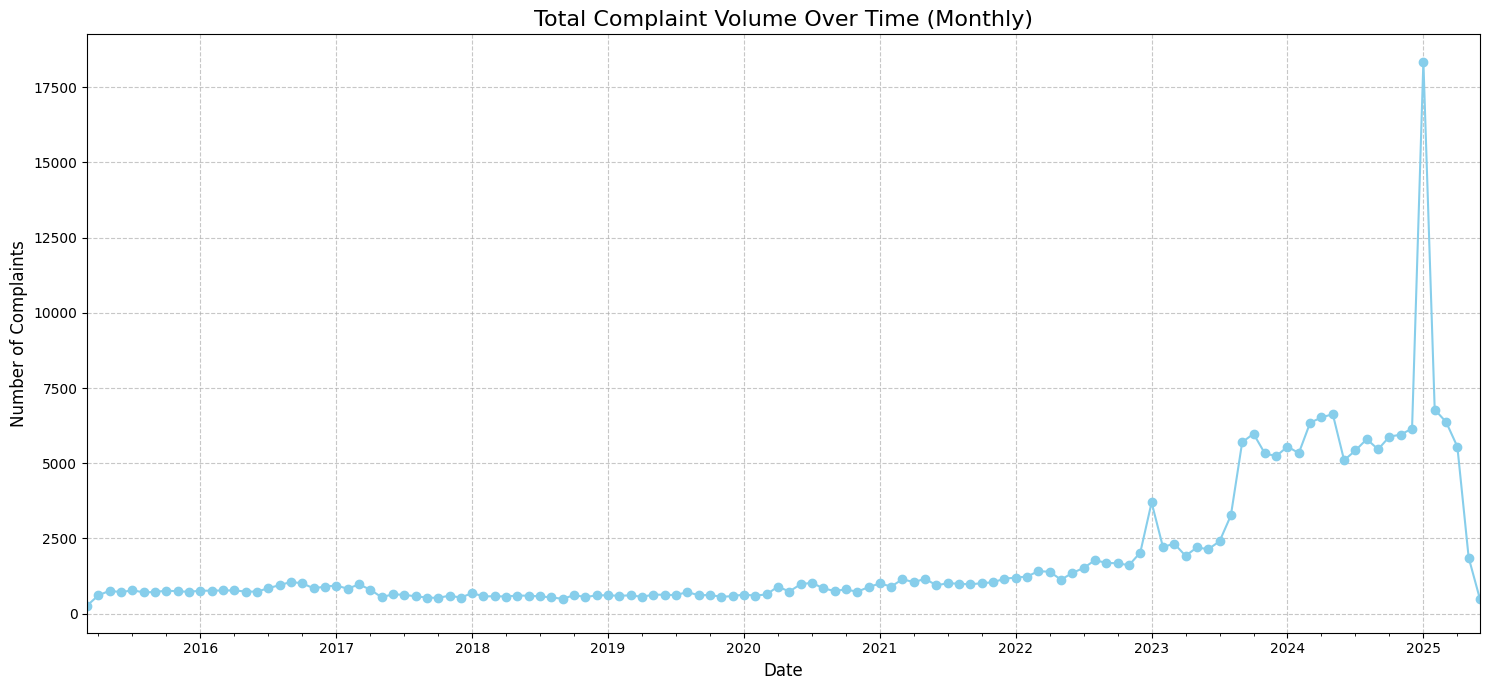


2. Analyzing Complaint Trends by Product Over Time (Monthly)


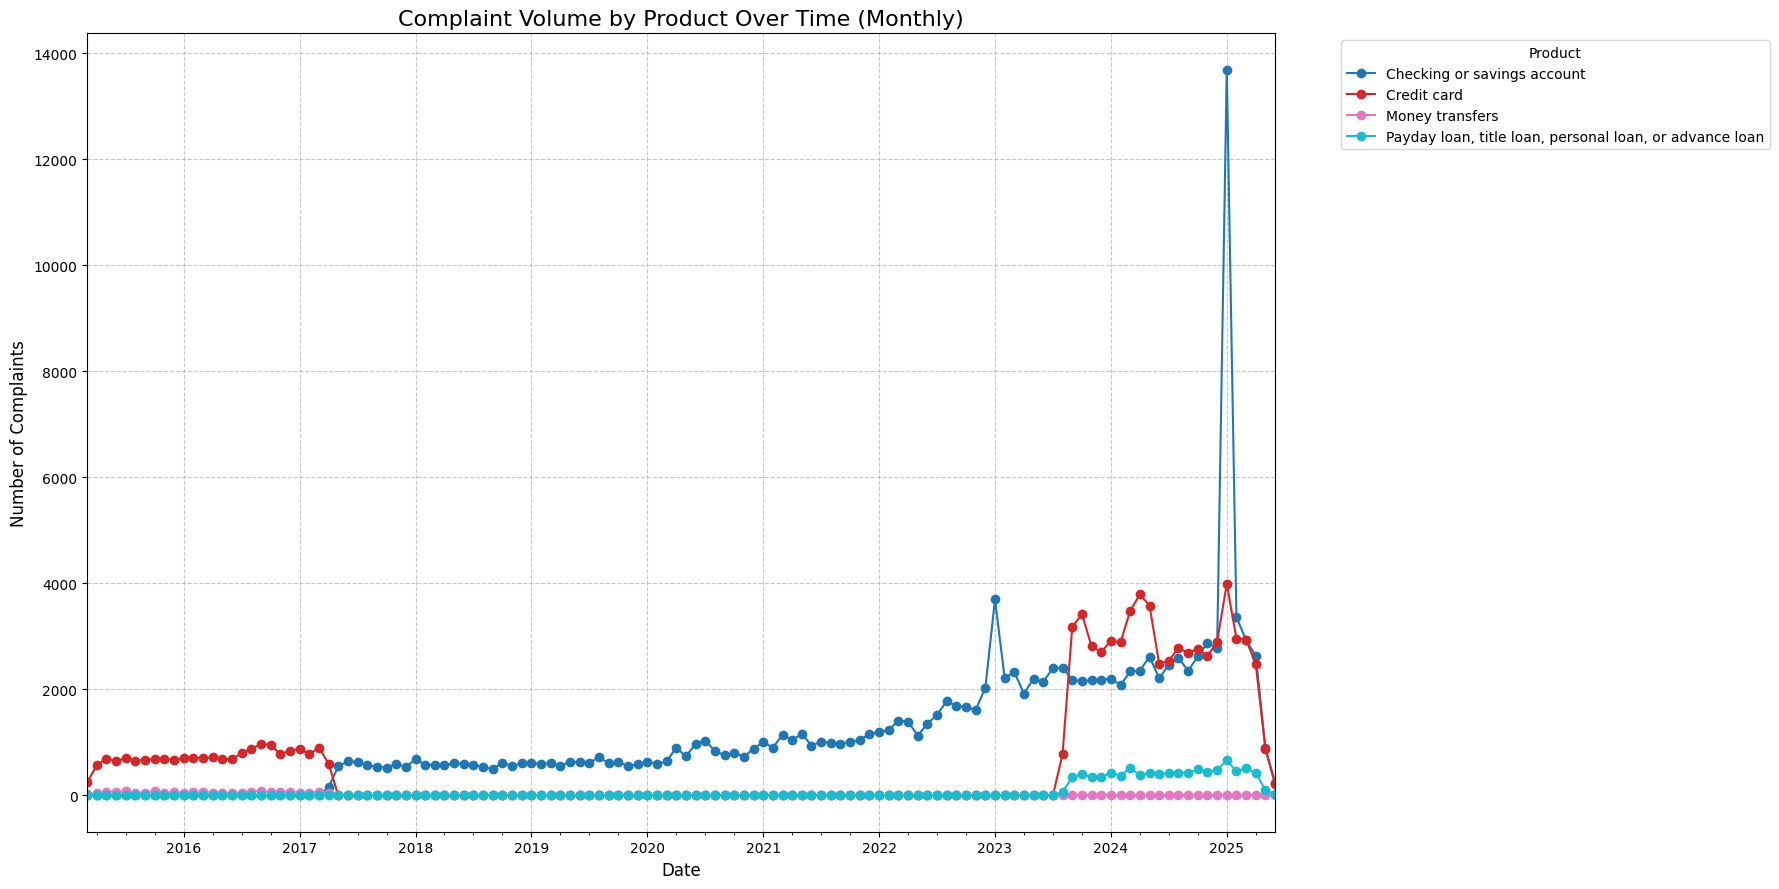


3. Exploring Seasonality: Complaints by Month of Year


/tmp/ipython-input-12-371430977.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaints_by_month.index, y=complaints_by_month.values, palette='viridis')


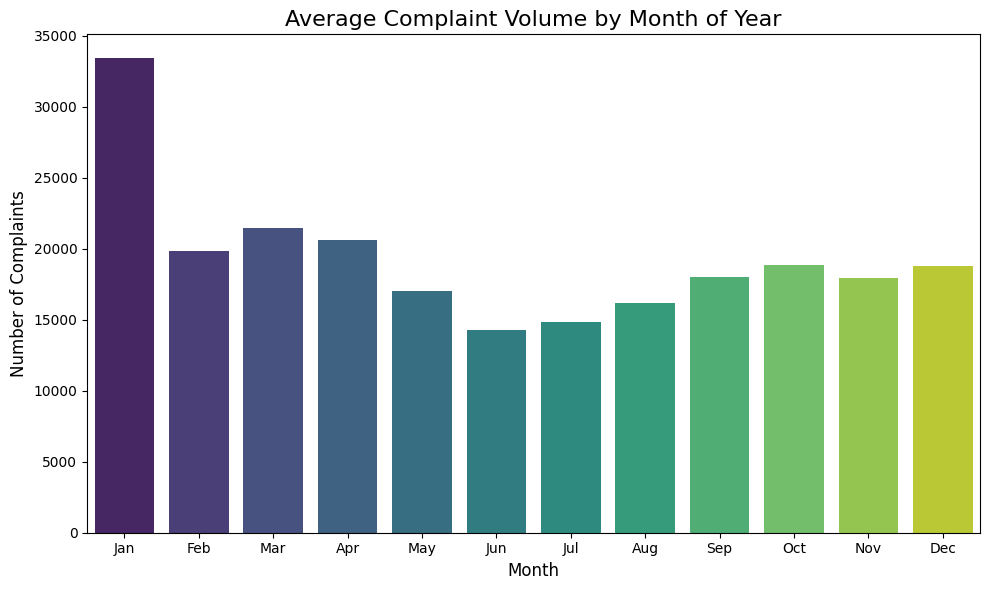


4. Exploring Seasonality: Complaints by Day of Week


/tmp/ipython-input-12-371430977.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaints_by_day_of_week.index, y=complaints_by_day_of_week.values, palette='plasma')


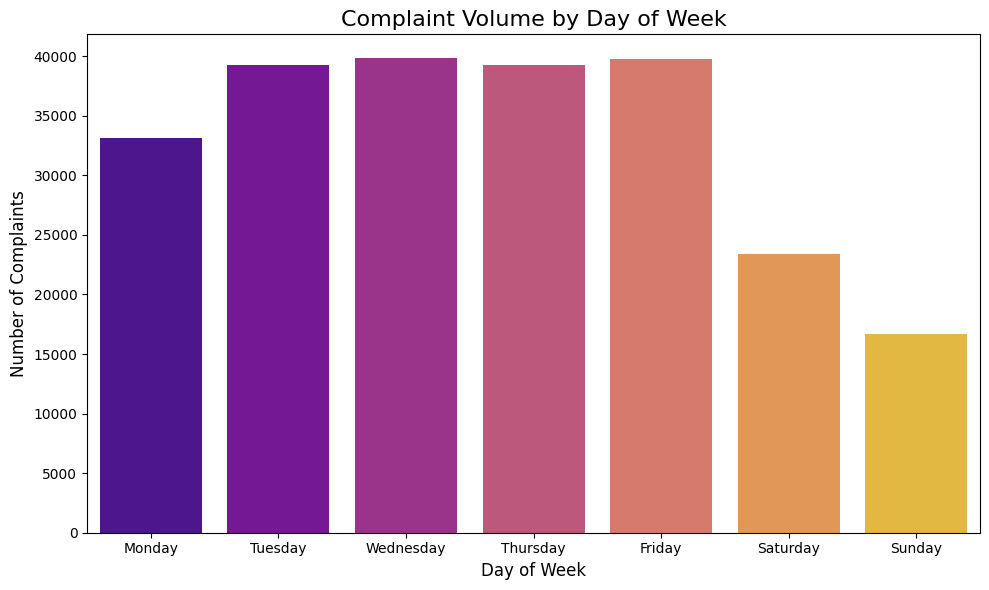


Temporal analysis complete. You can now observe trends, seasonal patterns, and product-specific complaint evolutions over time.


In [ ]:
print("\n--- Performing Temporal Analysis ---")

# Ensure 'Date received' is in datetime format and drop rows where it's NaT
print("Checking and converting 'Date received' column to datetime...")
filtered_df['Date received'] = pd.to_datetime(filtered_df['Date received'], errors='coerce')
filtered_df.dropna(subset=['Date received'], inplace=True)
print(f"DataFrame shape after dropping rows with invalid dates: {filtered_df.shape}")

if filtered_df.empty:
    print("No valid date data found after cleaning and filtering. Cannot perform temporal analysis.")
    exit()

# Set 'Date received' as the index for time-series operations
filtered_df.set_index('Date received', inplace=True)
filtered_df.sort_index(inplace=True)

# Extract temporal features
filtered_df['Year'] = filtered_df.index.year
filtered_df['Month'] = filtered_df.index.month
filtered_df['Day_of_Week'] = filtered_df.index.day_name()
filtered_df['Month_Year'] = filtered_df.index.to_period('M') # For grouping by month and year

# --- 1. Overall Complaint Volume Over Time (Monthly) ---
print("\n1. Analyzing Overall Complaint Volume Over Time (Monthly)")
monthly_complaints = filtered_df.resample('M').size()

plt.figure(figsize=(15, 7))
monthly_complaints.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Total Complaint Volume Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- 2. Complaint Trends by Product Over Time (Monthly) ---
print("\n2. Analyzing Complaint Trends by Product Over Time (Monthly)")
# Group by Month-Year and Product, then count complaints
product_monthly_complaints = filtered_df.groupby(['Month_Year', 'Product']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 9))
product_monthly_complaints.plot(kind='line', marker='o', linestyle='-', ax=plt.gca(), cmap='tab10')
plt.title('Complaint Volume by Product Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 3. Explore Seasonality (Complaints by Month of Year) ---
print("\n3. Exploring Seasonality: Complaints by Month of Year")
complaints_by_month = filtered_df.groupby('Month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=complaints_by_month.index, y=complaints_by_month.values, palette='viridis')
plt.title('Average Complaint Volume by Month of Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# --- 4. Explore Seasonality (Complaints by Day of Week) ---
print("\n4. Exploring Seasonality: Complaints by Day of Week")
# Ensure days are in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
complaints_by_day_of_week = filtered_df['Day_of_Week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=complaints_by_day_of_week.index, y=complaints_by_day_of_week.values, palette='plasma')
plt.title('Complaint Volume by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTemporal analysis complete. You can now observe trends, seasonal patterns, and product-specific complaint evolutions over time.")

In [ ]:
filtered_df.to_csv('../data/filtered_complaints.csv')